In [22]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [23]:
all_df = pd.read_excel("data/titanic3.xls")

In [24]:
cols=['survived','name','pclass' ,'sex', 'age',
       'fare',]
all_df=all_df[cols]

In [25]:
df=all_df.drop(['name'], axis=1)
age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)
fare_mean = df['fare'].mean()
df['fare'] = df['fare'].fillna(fare_mean)
df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)

In [26]:
msk = numpy.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]
print('total:',len(df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [27]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_Features=minmax_scale.fit_transform(train_Features)  
test_Features=minmax_scale.fit_transform(test_Features)

In [28]:
train_Features[355:359]

array([[0.5       , 0.        , 0.32049799, 0.12687155],
       [0.5       , 0.        , 0.64665896, 0.12687155],
       [0.5       , 0.        , 0.74178924, 0.03122992],
       [0.5       , 1.        , 0.32049799, 0.14346245]])

In [29]:
train_Label[:4]

array([1., 1., 0., 0.])

In [30]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

In [31]:
model = Sequential()

In [32]:
model.add(Embedding(input_dim=4,output_dim=1))

In [33]:
model.add(SimpleRNN(units=4))

In [34]:
model.add(Dense(1, activation = "sigmoid"))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 1)           4         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [37]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 1s - loss: 0.6855 - acc: 0.5871 - val_loss: 0.6448 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6731 - acc: 0.5871 - val_loss: 0.6062 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6606 - acc: 0.5871 - val_loss: 0.5840 - val_acc: 0.7885
Epoch 4/30
 - 0s - loss: 0.6428 - acc: 0.5871 - val_loss: 0.5566 - val_acc: 0.7885
Epoch 5/30
 - 0s - loss: 0.6156 - acc: 0.7495 - val_loss: 0.5289 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.5851 - acc: 0.7785 - val_loss: 0.5005 - val_acc: 0.7885
Epoch 7/30
 - 0s - loss: 0.5596 - acc: 0.7785 - val_loss: 0.4791 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.5409 - acc: 0.7785 - val_loss: 0.4690 - val_acc: 0.7885
Epoch 9/30
 - 0s - loss: 0.5281 - acc: 0.7785 - val_loss: 0.4617 - val_acc: 0.7885
Epoch 10/30
 - 0s - loss: 0.5187 - acc: 0.7785 - val_loss: 0.4565 - val_acc: 0.7885
Epoch 11/30
 - 0s - loss: 0.5114 - acc: 0.7785 - val_loss: 0.4537 - val_acc: 0.7885
Epoch 12/30
 - 0s - loss: 0.5060 - acc:

In [38]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

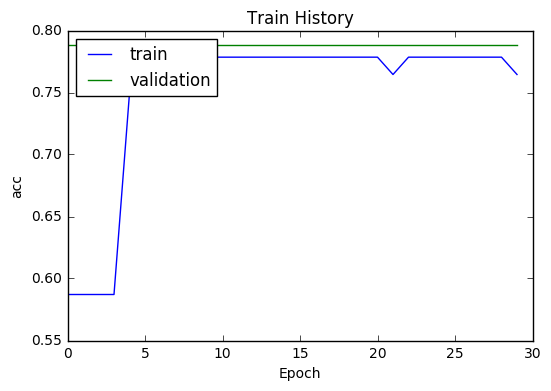

In [39]:
show_train_history(train_history,'acc','val_acc')

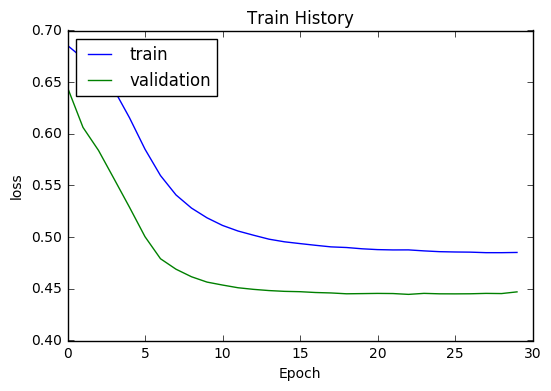

In [40]:
show_train_history(train_history,'loss','val_loss')

In [41]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 91us/step


In [42]:
scores[1]

0.8072727277062156